# Librerías

In [1]:
import pandas as pd
import numpy as np
import os
import folium 
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from varclushi import VarClusHi
from scipy.stats import ks_2samp
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
#Estas son las bibliotecas utilizadas a lo largo del módulo, las cuales son útiles para realizar análisis de datos.

# Lectura/carga de datos

In [2]:
df = pd.read_csv('proyecto_data.csv')

# Seleccionamos el conjunto de datos en formato CSV utilizando 
# la función pd.read_csv y lo asignamos a la variable df.

# Funciones


# Pre analisis

In [3]:
# Con la intención de entender mejor el conjunto de datos, realizamos un 
# pequeño análisis de las celdas y columnas contenidas en el archivo.

In [4]:
df.shape
# Con esta funcion vemos la cantidad de filas y columnas respectivamente de tu DataFrame

(9399, 22)

In [5]:
df.head()
# Con esta funcion vemos las primeras 5 filas del DataFrame

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527000,-116.779167,11.64,0.94,ml,9.0,240.0,0.05186,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.43,1.970,0.331,11.0,automatic,ci,ci
1,2023-02-06T09:04:16.590Z,19.193001,-155.392838,32.18,2.77,md,33.0,180.0,NaN,0.12,...,2023-02-06T09:07:27.210Z,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.780,2.770,4.0,automatic,hv,hv
2,2023-02-06T08:58:45.507Z,61.110200,-151.162700,53.90,2.00,ml,NaN,NaN,NaN,0.75,...,2023-02-06T09:01:03.183Z,"4 km NNW of Tyonek, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
3,2023-02-06T08:52:37.335Z,37.449000,37.233400,10.00,4.80,mb,58.0,61.0,0.27700,0.78,...,2023-02-06T09:31:48.040Z,"7 km SW of Pazarcık, Turkey",earthquake,7.54,1.884,0.072,60.0,reviewed,us,us
4,2023-02-06T08:51:11.930Z,38.842667,-122.829666,2.48,0.66,md,11.0,115.0,0.01295,0.03,...,2023-02-06T09:15:15.395Z,"10km WNW of Cobb, CA",earthquake,0.33,0.990,0.240,12.0,automatic,nc,nc


In [6]:
df.describe()
# Obtener estadísticas descriptivas resumidas de un DataFrame, como la media, la mediana, 
# la desviación estándar, el mínimo y el máximo de cada columna numérica

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9399.000000,9399.000000,9399.000000,9399.000000,6735.000000,6734.000000,5350.000000,9399.000000,6232.000000,9399.000000,6667.000000,6724.000000
mean,41.267491,-116.017013,26.933842,1.633398,24.194061,118.276677,0.697541,0.308940,1.822996,2.115687,0.256163,16.267995
std,19.751939,68.529045,57.151409,1.262600,22.996614,63.351387,2.258458,0.292379,3.174955,10.765662,0.429285,23.914914
min,-64.428900,-179.994000,-3.410000,-1.120000,0.000000,11.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.928250,-152.681700,3.090000,0.860000,9.000000,69.000000,0.013690,0.090000,0.260000,0.400000,0.106000,6.000000
50%,38.831501,-122.817001,9.300000,1.400000,17.000000,103.000000,0.057880,0.180000,0.430000,0.700000,0.166000,10.000000
75%,58.250083,-116.764583,28.780000,2.100000,32.000000,157.000000,0.207850,0.510000,0.980000,1.500000,0.242312,18.000000
max,84.884100,179.983300,653.645000,7.800000,345.000000,352.540000,41.027000,4.090000,21.360000,946.400000,5.270000,502.000000


# Diccionario de datos 

    - latitude : float64 que representa la latitud del epicentro del evento sísmico.
    - longitude: float64 que representa la longitud del epicentro del evento sísmico.
    - depth    : float64 que representa la profundidad del evento sísmico en kilómetros.
    - mag      : float64 que representa la magnitud del evento sísmico en la escala de Richter.
    - magType  : objeto (string) que representa el tipo de escala de magnitud utilizada para el evento sísmico.
    - nst      : float64 que representa el número de estaciones sismográficas que registraron el evento sísmico.
    - gap      : float64 que representa el ángulo de separación máximo entre las estaciones sismográficas más                        cercanas que registraron el evento sísmico.
    - dmin     : float64 que representa la distancia en grados entre el epicentro del evento sísmico y la estación                    sismográfica más cercana que lo registró.
    - rms      : float64 que representa la amplitud de la señal registrada por las estaciones sismográficas para el                  evento sísmico.
    - net      : objeto (string) que representa la red sismográfica que registró el evento sísmico.
    - id       : objeto (string) que representa el identificador único del evento sísmico.
    - updated  : objeto (string) que representa la fecha y hora en que se actualizó por última vez el registro del                    evento sísmico.
    - place    : objeto (string) que representa el lugar donde ocurrió el evento sísmico.
    - type     : objeto (string) que representa el tipo de evento sísmico.
    - horizontalError: float64 que representa el error en la localización horizontal del epicentro del evento                              sísmico.
    - depthError: float64 que representa el error en la localización vertical (profundidad) del epicentro del evento                   sísmico.
    - magError : float64 que representa el error en la magnitud del evento sísmico.
    - magNst   : float64 que representa el número de estaciones sismográficas que se utilizaron para calcular la                      magnitud del evento sísmico.
    - status   : objeto (string) que representa el estado del registro del evento sísmico.
    - locationSource: objeto (string) que representa la fuente de datos utilizada para la localización del evento                         sísmico.
    - magSource: objeto (string) que representa la fuente de datos utilizada para calcular la magnitud del evento                    sísmico.

In [7]:
df.dtypes
# mostrar los tipos de datos de las columnas en un DataFrame. 
# en este caso en particular

# 'float64'se refiere a variables que contienen números con decimales, como 1.2, 3.14 o 100.0.
# 'object' se refiere a variables que contienen texto o cadenas de caracteres, como "hola", "mundo" o "terremoto".

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

# Limpieza / tratamiento

In [8]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527000,-116.779167,11.64,0.94,ml,9.0,240.0,0.05186,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.43,1.970,0.331,11.0,automatic,ci,ci
1,2023-02-06T09:04:16.590Z,19.193001,-155.392838,32.18,2.77,md,33.0,180.0,NaN,0.12,...,2023-02-06T09:07:27.210Z,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.780,2.770,4.0,automatic,hv,hv
2,2023-02-06T08:58:45.507Z,61.110200,-151.162700,53.90,2.00,ml,NaN,NaN,NaN,0.75,...,2023-02-06T09:01:03.183Z,"4 km NNW of Tyonek, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
3,2023-02-06T08:52:37.335Z,37.449000,37.233400,10.00,4.80,mb,58.0,61.0,0.27700,0.78,...,2023-02-06T09:31:48.040Z,"7 km SW of Pazarcık, Turkey",earthquake,7.54,1.884,0.072,60.0,reviewed,us,us
4,2023-02-06T08:51:11.930Z,38.842667,-122.829666,2.48,0.66,md,11.0,115.0,0.01295,0.03,...,2023-02-06T09:15:15.395Z,"10km WNW of Cobb, CA",earthquake,0.33,0.990,0.240,12.0,automatic,nc,nc


In [9]:
df.isnull()
# para verificar si hay valores nulos o faltantes en nuestro DataFrame

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
9395,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
9396,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
9397,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False


In [10]:
df.isnull().sum()
# Ver cada columa y ver cuantos valores vacios hay en cada una
# vemos que tenemos muchos valores faltantes los cuales son:

# nst (2664): representa el número de estaciones sismográficas que registraron el evento sísmico

# gap (2665): representa el ángulo de separación máximo entre las estaciones sismográficas más 
#             cercanas que registraron el evento sísmico.

# dmin(4049): representa la distancia en grados entre el epicentro del evento sísmico y la estación 
#             sismográfica más cercana que lo registró.

# horizontalError(3167): representa el error en la localización horizontal del epicentro del evento sísmico.

# magError(2732): representa el error en la magnitud del evento sísmico.

# magNst(2675): representa el número de estaciones sismográficas que se utilizaron para calcular la 
#               magnitud del evento sísmico.

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2664
gap                2665
dmin               4049
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3167
depthError            0
magError           2732
magNst             2675
status                0
locationSource        0
magSource             0
dtype: int64

In [11]:
c_v_p = ['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst']
# c_v_p: Columnas con valores perdidos 



In [12]:
imputer = SimpleImputer(strategy='mean')
df[c_v_p ] = imputer.fit_transform(df[c_v_p ])
# Imputación de los valores faltantes con la media de cada columna

In [13]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527000,-116.779167,11.64,0.94,ml,9.000000,240.000000,0.051860,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.430000,1.970,0.331000,11.000000,automatic,ci,ci
1,2023-02-06T09:04:16.590Z,19.193001,-155.392838,32.18,2.77,md,33.000000,180.000000,0.697541,0.12,...,2023-02-06T09:07:27.210Z,"9 km E of Pāhala, Hawaii",earthquake,0.620000,0.780,2.770000,4.000000,automatic,hv,hv
2,2023-02-06T08:58:45.507Z,61.110200,-151.162700,53.90,2.00,ml,24.194061,118.276677,0.697541,0.75,...,2023-02-06T09:01:03.183Z,"4 km NNW of Tyonek, Alaska",earthquake,1.822996,1.000,0.256163,16.267995,automatic,ak,ak
3,2023-02-06T08:52:37.335Z,37.449000,37.233400,10.00,4.80,mb,58.000000,61.000000,0.277000,0.78,...,2023-02-06T09:31:48.040Z,"7 km SW of Pazarcık, Turkey",earthquake,7.540000,1.884,0.072000,60.000000,reviewed,us,us
4,2023-02-06T08:51:11.930Z,38.842667,-122.829666,2.48,0.66,md,11.000000,115.000000,0.012950,0.03,...,2023-02-06T09:15:15.395Z,"10km WNW of Cobb, CA",earthquake,0.330000,0.990,0.240000,12.000000,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2023-01-07T09:56:14.929Z,61.695000,-146.491500,36.60,1.10,ml,24.194061,118.276677,0.697541,0.41,...,2023-01-25T02:21:24.901Z,"36 km SSE of Nelchina, Alaska",earthquake,1.822996,0.600,0.256163,16.267995,reviewed,ak,ak
9395,2023-01-07T09:52:03.738Z,62.316500,-151.554000,90.60,1.20,ml,24.194061,118.276677,0.697541,0.38,...,2023-01-25T02:21:24.696Z,"37 km NNW of Skwentna, Alaska",earthquake,1.822996,0.500,0.256163,16.267995,reviewed,ak,ak
9396,2023-01-07T09:50:20.885Z,69.150700,-144.563700,15.70,1.60,ml,24.194061,118.276677,0.697541,0.23,...,2023-01-26T00:27:22.082Z,"115 km SSW of Kaktovik, Alaska",earthquake,1.822996,2.200,0.256163,16.267995,reviewed,ak,ak
9397,2023-01-07T09:42:17.484Z,67.472500,-166.586100,19.50,1.80,ml,24.194061,118.276677,0.697541,0.31,...,2023-01-26T00:27:21.910Z,"91 km WSW of Kivalina, Alaska",earthquake,1.822996,1.300,0.256163,16.267995,reviewed,ak,ak


In [14]:
df.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [16]:
df['nst'] = np.floor(df['nst'])
df['magNst'] = np.floor(df['magNst'])

#Redondeo hacia abajo

In [17]:

df['time'] = pd.to_datetime(df['time'])
df['updated'] = pd.to_datetime(df['updated'])
# Convertir columnas de tiempo a formato de fecha y hora

In [18]:

df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['updated'] = df['updated'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Dar formato deseado

In [19]:
df['time'] = pd.to_datetime(df['time'])
df['updated'] = pd.to_datetime(df['updated'])

In [20]:
pd.options.display.max_columns = None

In [21]:
df['gap'] = df['gap'].round(2)
df['horizontalError'] = df['horizontalError'].round(2)
df['dmin'] = df['dmin'].round(2)
df['depthError'] = df['depthError'].round(2)
df['magError'] = df['magError'].round(2)
# redondeamos a dos decimales esas columnas

In [22]:
cols = ['depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']


for col in cols:
    if df[col].min() < 0:
        print(f"La columna '{col}' tiene valores negativos.")
# Verificar si hay valores negativos en cada columna

La columna 'depth' tiene valores negativos.
La columna 'mag' tiene valores negativos.


In [23]:
df['depth'] = df['depth'].abs()
df['mag'] = df['mag'].abs()

In [24]:
df
# en este punto concidero que el dataframe esta listo para comenzar con la ingeneria de variables

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.00,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"10km WSW of Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.00,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv
2,2023-02-06 08:58:45,61.110200,-151.162700,53.90,2.00,ml,24.0,118.28,0.70,0.75,ak,ak0231pbzu3m,2023-02-06 09:01:03,"4 km NNW of Tyonek, Alaska",earthquake,1.82,1.00,0.26,16.0,automatic,ak,ak
3,2023-02-06 08:52:37,37.449000,37.233400,10.00,4.80,mb,58.0,61.00,0.28,0.78,us,us6000jlpv,2023-02-06 09:31:48,"7 km SW of Pazarcık, Turkey",earthquake,7.54,1.88,0.07,60.0,reviewed,us,us
4,2023-02-06 08:51:11,38.842667,-122.829666,2.48,0.66,md,11.0,115.00,0.01,0.03,nc,nc73842531,2023-02-06 09:15:15,"10km WNW of Cobb, CA",earthquake,0.33,0.99,0.24,12.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2023-01-07 09:56:14,61.695000,-146.491500,36.60,1.10,ml,24.0,118.28,0.70,0.41,ak,ak023bqg8ol,2023-01-25 02:21:24,"36 km SSE of Nelchina, Alaska",earthquake,1.82,0.60,0.26,16.0,reviewed,ak,ak
9395,2023-01-07 09:52:03,62.316500,-151.554000,90.60,1.20,ml,24.0,118.28,0.70,0.38,ak,ak023bqfhfp,2023-01-25 02:21:24,"37 km NNW of Skwentna, Alaska",earthquake,1.82,0.50,0.26,16.0,reviewed,ak,ak
9396,2023-01-07 09:50:20,69.150700,-144.563700,15.70,1.60,ml,24.0,118.28,0.70,0.23,ak,ak023bqf3bc,2023-01-26 00:27:22,"115 km SSW of Kaktovik, Alaska",earthquake,1.82,2.20,0.26,16.0,reviewed,ak,ak
9397,2023-01-07 09:42:17,67.472500,-166.586100,19.50,1.80,ml,24.0,118.28,0.70,0.31,ak,ak023bqddbr,2023-01-26 00:27:21,"91 km WSW of Kivalina, Alaska",earthquake,1.82,1.30,0.26,16.0,reviewed,ak,ak


# Ingenieria de variables 

In [25]:
df['s_tipo_profu'] = np.where(df['depth'] <= 70, 'superficial',
                    np.where((df['depth'] >= 71) & (df['depth'] <= 299), 'intermedio',
                    np.where(df['depth'] >= 300, 'profundo', 'N/A')))
# creamos la columnas tipo_profu: tipo de profundidad 

In [26]:
df['s_region'] = df['place'].str.split('of', expand=True)[1].str.strip()
# generamos la columna region

In [27]:
df['s_danio'] = np.where(df['mag'] < 3.5, 'sin danios',
                    np.where((df['mag'] >= 3.5) & (df['mag'] <= 5.4), 'danios menores',
                    np.where((df['mag'] >= 5.5) & (df['mag'] <= 6), 'danios ligeros',
                    np.where((df['mag'] >= 6.1) & (df['mag'] <= 6.9), 'danios severos',
                    np.where((df['mag'] >= 7.0) & (df['mag'] <= 7.9), 'danios graves', 
                    np.where(df['mag'] >= 8.0, 'danios totales', ''))))))

# agragamos la columa de danio, la cual significa: cantidad de daño.

In [28]:
df['prec_gap'] = np.where(df['gap'] <= 90, 'muy preciso',
                np.where((df['gap'] >= 91) & (df['gap'] <= 119), 'regu preciso',
                np.where(df['gap'] >= 120, 'poco preciso', 'otro valor')))

#generamos la oclumna prec_gap: precision por gpa (angulo de separacion entre estaciones)

In [29]:
df['dia_sem'] = df['time'].dt.strftime('%A')

In [30]:
df['intensidad'] = np.where(df['mag'] < 3.5, 'sin',
                            np.where((df['mag'] >= 3.5) & (df['mag'] <= 5.4), 'baja',
                                     np.where((df['mag'] >= 5.5) & (df['mag'] <= 6), 'moderado',
                                              np.where((df['mag'] >= 6.1) & (df['mag'] <= 6.9), 'alta',
                                                       np.where((df['mag'] >= 7.0) & (df['mag'] <= 7.9), 'muy alta',
                                                                'dt')))))


In [31]:
df.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,s_tipo_profu,s_region,s_danio,prec_gap,dia_sem,intensidad
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.00,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"10km WSW of Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci,superficial,"Anza, CA",sin danios,poco preciso,Monday,sin
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.00,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv,superficial,"Pāhala, Hawaii",sin danios,poco preciso,Monday,sin
2,2023-02-06 08:58:45,61.110200,-151.162700,53.90,2.00,ml,24.0,118.28,0.70,0.75,ak,ak0231pbzu3m,2023-02-06 09:01:03,"4 km NNW of Tyonek, Alaska",earthquake,1.82,1.00,0.26,16.0,automatic,ak,ak,superficial,"Tyonek, Alaska",sin danios,regu preciso,Monday,sin


In [32]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000
mean,41.267491,-116.017013,26.981485,1.667878,24.139057,118.277619,0.698576,0.308940,1.821983,2.115674,0.257275,16.191723
std,19.751939,68.529045,57.128929,1.216683,19.466466,53.621964,1.703873,0.292379,2.585228,10.765652,0.361553,20.227417
min,-64.428900,-179.994000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.928250,-152.681700,3.100000,0.860000,12.000000,82.000000,0.040000,0.090000,0.320000,0.400000,0.130000,7.000000
50%,38.831501,-122.817001,9.300000,1.400000,24.000000,118.280000,0.700000,0.180000,1.010000,0.700000,0.220000,16.000000
75%,58.250083,-116.764583,28.780000,2.100000,24.000000,134.000000,0.700000,0.510000,1.820000,1.500000,0.260000,16.000000
max,84.884100,179.983300,653.645000,7.800000,345.000000,352.540000,41.030000,4.090000,21.360000,946.400000,5.270000,502.000000


In [33]:
df['s_region'].value_counts()

The Geysers, CA           865
Karluk, Alaska            486
Cobb, CA                  359
Pāhala, Hawaii            293
Adak, Alaska              175
                         ... 
Khorugh, Tajikistan         1
Pangai, Tonga               1
Abra Pampa, Argentina       1
Port Hueneme, CA            1
Pointe-Calumet, Canada      1
Name: s_region, Length: 1085, dtype: int64

In [34]:
df2 = df.loc[:, ['depth', 'mag', 'type', 'status', 's_tipo_profu', 's_danio', 'prec_gap', 'dia_sem', 'intensidad']]

In [35]:
df2.head(3)

,depth,mag,type,status,s_tipo_profu,s_danio,prec_gap,dia_sem,intensidad
0,11.64,0.94,earthquake,automatic,superficial,sin danios,poco preciso,Monday,sin
1,32.18,2.77,earthquake,automatic,superficial,sin danios,poco preciso,Monday,sin
2,53.90,2.00,earthquake,automatic,superficial,sin danios,regu preciso,Monday,sin


# Normalizacion/codificacion

In [36]:
df2['intensidad'].value_counts()

sin         8382
baja         980
moderado      27
alta           6
muy alta       4
Name: intensidad, dtype: int64

In [37]:
type_mapping = {
    'earthquake': 0,
    'explosion': 1,
    'quarry blast': 2,
    'ice quake': 3,
    'other event': 4
}
df2['type_cod'] = df2['type'].map(type_mapping)

In [38]:
status_mapping = {
    'reviewed': 0,
    'automatic': 1,
}
df2['status_cod'] = df2['status'].map(status_mapping)

In [39]:
s_tipo_profu_mapping = {
    'superficial': 0,
    'intermedio': 1,
    'profundo': 2,
    'N/A': 3
}
df2['s_tipo_profu_cod'] = df2['s_tipo_profu'].map(s_tipo_profu_mapping)

In [40]:
s_danio_mapping = {
    'sin danios': 0,
    'danios menores': 1,
    'danios ligeros': 2,
    'danios severos': 3,
    'danios graves': 4
}
df2['s_danio_cod'] = df2['s_danio'].map(s_danio_mapping)

In [41]:
prec_gap_mapping = {
    'regu preciso': 0,
    'muy preciso': 1,
    'poco preciso': 2,
    'otro valor': 3
}
df2['prec_gap_cod'] = df2['prec_gap'].map(prec_gap_mapping)

In [42]:
dia_sem_mapping = {
    'Sunday': 0,
    'Saturday': 1,
    'Monday': 2,
    'Thursday': 3,
    'Tuesday': 4,
    'Friday': 5,
    'Wednesday': 6
}
df2['dia_sem_cod'] = df2['dia_sem'].map(dia_sem_mapping)

In [43]:
intensidad_mapping = {
    'sin': 0,
    'baja': 1,
    'moderado': 2,
    'alta': 3,
    'muy alta': 4
}
df2['intensidad_cod'] = df2['intensidad'].map(intensidad_mapping)

In [44]:
df2.head(2)

,depth,mag,type,status,s_tipo_profu,s_danio,prec_gap,dia_sem,intensidad,type_cod,status_cod,s_tipo_profu_cod,s_danio_cod,prec_gap_cod,dia_sem_cod,intensidad_cod
0,11.64,0.94,earthquake,automatic,superficial,sin danios,poco preciso,Monday,sin,0,1,0,0,2,2,0
1,32.18,2.77,earthquake,automatic,superficial,sin danios,poco preciso,Monday,sin,0,1,0,0,2,2,0


In [45]:
df3 = df2.loc[:, ['depth', 'mag', 'type_cod', 'status_cod', 's_tipo_profu_cod', 's_danio_cod', 'prec_gap_cod', 'intensidad_cod', 'dia_sem_cod']]

In [46]:
df3.head(2)

,depth,mag,type_cod,status_cod,s_tipo_profu_cod,s_danio_cod,prec_gap_cod,intensidad_cod,dia_sem_cod
0,11.64,0.94,0,1,0,0,2,0,2
1,32.18,2.77,0,1,0,0,2,0,2


In [47]:
scaler = StandardScaler()
df3_estandarizado = df3.copy()
df3_estandarizado[df3_estandarizado.columns] = scaler.fit_transform(df3_estandarizado[df3_estandarizado.columns])

In [48]:
df3_estandarizado.head(3)

,depth,mag,type_cod,status_cod,s_tipo_profu_cod,s_danio_cod,prec_gap_cod,intensidad_cod,dia_sem_cod
0,-0.268556,-0.598280,-0.109848,1.994564,-0.328657,-0.334493,1.336724,-0.334493,-0.436281
1,0.091001,0.905889,-0.109848,1.994564,-0.328657,-0.334493,1.336724,-0.334493,-0.436281
2,0.471214,0.272988,-0.109848,1.994564,-0.328657,-0.334493,-1.072224,-0.334493,-0.436281


# PCA

In [49]:
num_components = 2 
pca = PCA(n_components=num_components)
df3_pca = pca.fit_transform(df3)
df3_pca = pd.DataFrame(data=df3_pca, columns=[f'PC{i+1}' for i in range(num_components)])

In [50]:
df3_pca.head(3)

,PC1,PC2
0,-15.349836,-0.882937
1,5.204504,-0.879410
2,26.921190,-0.866534


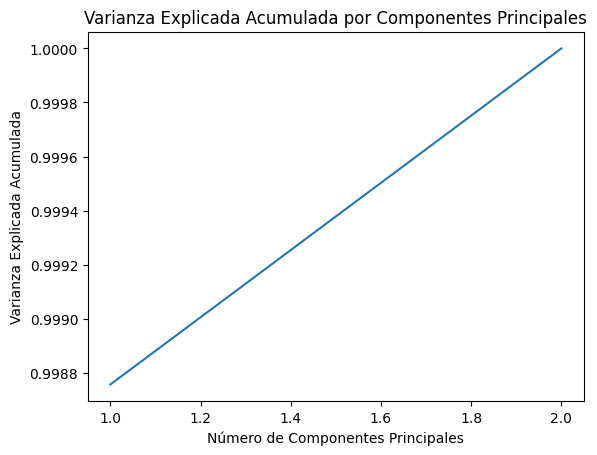

In [51]:
pca = PCA(n_components=num_components)
df3_pca_components = pca.fit_transform(df3_pca)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, num_components + 1), explained_variance_ratio_cumsum,)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()

/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

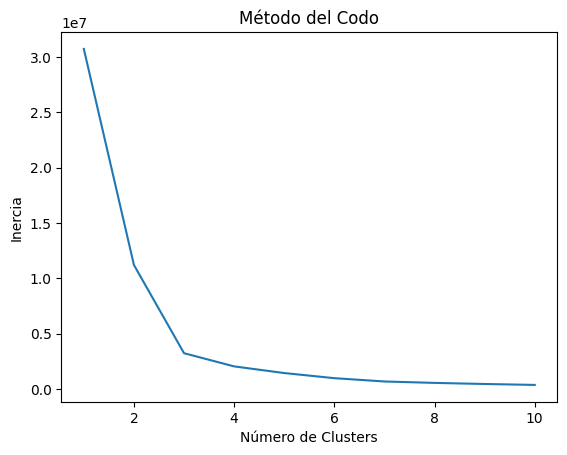

In [52]:
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df3_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# CLustering

In [53]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df3_pca)
cluster_labels = kmeans.labels_
df3_pca['Cluster'] = cluster_labels

/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
df3_pca.head(3)

,PC1,PC2,Cluster
0,-15.349836,-0.882937,0
1,5.204504,-0.879410,0
2,26.921190,-0.866534,0


In [55]:
df3_pca['Cluster'].value_counts()

0    8094
2    1219
1      86
Name: Cluster, dtype: int64

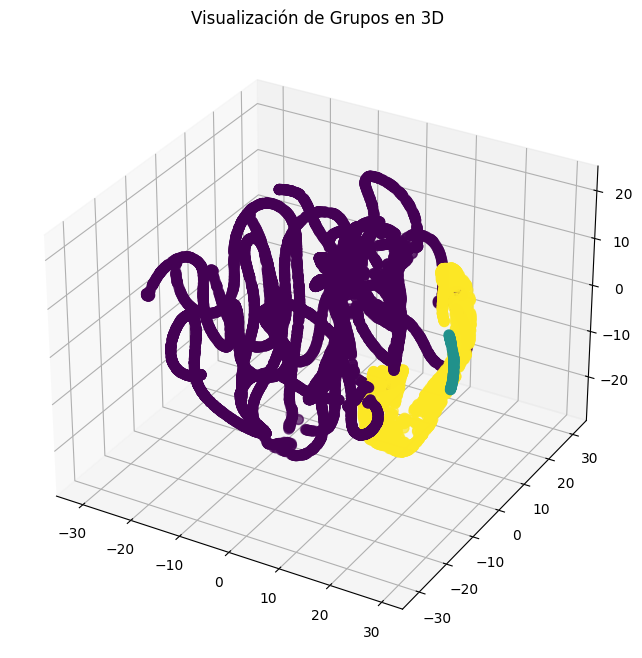

In [56]:
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(n_components=3, random_state=42)
data_3d = tsne.fit_transform(df3_pca)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cluster_labels = kmeans.labels_
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.set_title('Visualización de Grupos en 3D')
plt.show()